# Project - Face Mask Segmentation

### Project Description:
In this hands-on project, the goal is to build a Face Mask Segmentation model which includes building a face detector 
to locate the position of a face in an image.

### Objective:
In this problem, we use "Transfer Learning" of an Image Segmentation model to
detect any object according to the problem in hand.
Here, we are particularly interested in segmenting faces in a given image

### Steps and Tasks:

● Load the dataset given in form .npy format.
○ We have already extracted the images from wider face-dataset and
added it in the file images.npy. You can directly use this file for this
project.
○ “images.npy” contains details about the image and it’s masks, there
is no separate CSV file for that
○ There is no separate train and test data given
● Create Features(images) and labels(mask) using that data.
● Load the pre-trained model and weights.
● Create a model using the above model.
● Define the Dice Coefficient and Loss function.
● Compile and fit the model.
● Evaluate the model.

### Select TensorFlow version 2.x in colab

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

### Initialize the random number generator

In [2]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Mount Google drive on google colab

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### Import necessary modules

In [4]:
import numpy as np
from numpy import load
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Change current working directory to project folder

In [5]:
import os
project_path = '/content/drive/My Drive/AIML/MODULE_PROJECT/CV_Project_Face_Mask_Segmentation/'

### Load the "images.npy" file 
- This file contains images 

In [6]:
images_path = project_path + "images.npy"
print(images_path)

/content/drive/My Drive/AIML/MODULE_PROJECT/CV_Project_Face_Mask_Segmentation/images.npy


In [7]:
data = np.load(images_path, allow_pickle=True)

####  Print the Shape

In [8]:
data.shape

(409, 2)

### Check sample images from the loaded "images.npy" file

In [9]:
data[10][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

### Set image dimensions   
- Initialize image height, image width with value: 224 

In [10]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
channel = 3

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [11]:
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_HEIGHT))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, channel))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
        img = img[:, :, :3]
    except:
        continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array 

#### X_train Shape

In [12]:
X_train = np.array(X_train)
X_train.shape

(409, 224, 224, 3)

#### Mask Shape

In [13]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

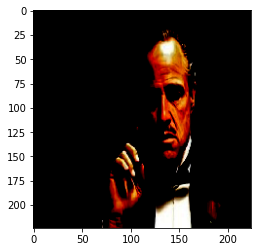

In [14]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

### Print mask on the sample Image

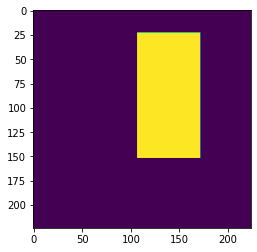

In [15]:
pyplot.imshow(masks[n])

### Create the model 
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [16]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable
    block_1 = model.get_layer("conv_pw_1_relu").output
    block0 = model.get_layer("conv_pw_3_relu").output
    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = Concatenate()([UpSampling2D()(x), block_1])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [17]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________

### Define dice coefficient function 
- Create a function to calculate dice coefficient

In [18]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function

In [19]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model 
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [20]:
model.compile(loss=loss, metrics=[dice_coefficient], optimizer="adam")

### Define checkpoint and earlystopping

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model 
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [22]:
model.fit(X_train, masks, epochs=10, verbose=1, batch_size=1,  callbacks=[checkpoint, reduce_lr, stop])

Streaming output truncated to the last 5000 lines.
370/409 [==========================>...] - ETA: 45s - loss: 0.6053 - dice_coefficient: 0.6927
Epoch 00004: loss did not improve from 0.45403
371/409 [==========================>...] - ETA: 44s - loss: 0.6045 - dice_coefficient: 0.6929
Epoch 00004: loss did not improve from 0.45403
372/409 [==========================>...] - ETA: 43s - loss: 0.6046 - dice_coefficient: 0.6926
Epoch 00004: loss did not improve from 0.45403
373/409 [==========================>...] - ETA: 41s - loss: 0.6047 - dice_coefficient: 0.6923
Epoch 00004: loss did not improve from 0.45403
374/409 [==========================>...] - ETA: 40s - loss: 0.6037 - dice_coefficient: 0.6928
Epoch 00004: loss did not improve from 0.45403
375/409 [==========================>...] - ETA: 39s - loss: 0.6031 - dice_coefficient: 0.6931
Epoch 00004: loss did not improve from 0.45403
376/409 [==========================>...] - ETA: 38s - loss: 0.6036 - dice_coefficient: 0.6926
Epoch 000

## Evaluate the Model

### Orginal Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


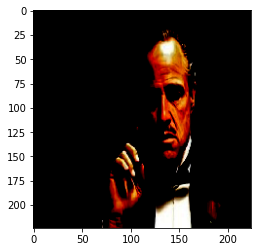

In [23]:
n = 10
pyplot.imshow(X_train[n])

### Get the predicted mask for the image 

In [24]:
sample_image = X_train[n]
ft = preprocess_input(np.array(sample_image, dtype=np.float32))
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([sample_image]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

### Impose the mask on the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


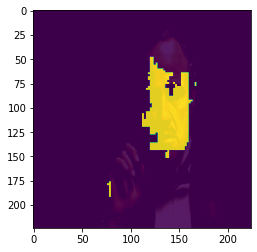

In [25]:
import matplotlib.pyplot as plt
out_image = sample_image
plt.imshow(out_image)
plt.imshow(pred_mask, alpha=0.9)

### Orginal Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


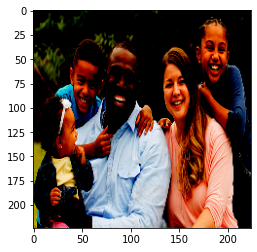

In [26]:
n = 140
pyplot.imshow(X_train[n])

### Get the predicted mask for the image 

In [27]:
sample_image = X_train[n]
ft = preprocess_input(np.array(sample_image, dtype=np.float32))
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([sample_image]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

### Impose the mask on the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


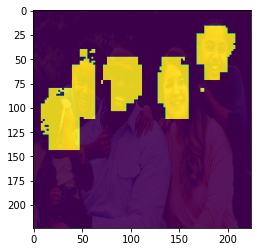

In [28]:
out_image = sample_image
plt.imshow(out_image)
plt.imshow(pred_mask, alpha=0.9)

### Orginal Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


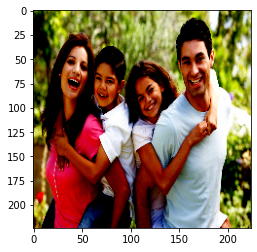

In [29]:
n = 190
pyplot.imshow(X_train[n])

### Get the predicted mask for the image 

In [30]:
sample_image = X_train[n]
ft = preprocess_input(np.array(sample_image, dtype=np.float32))
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([sample_image]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

### Impose the mask on the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


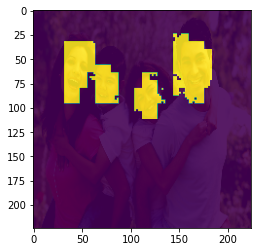

In [31]:
out_image = sample_image
plt.imshow(out_image)
plt.imshow(pred_mask, alpha=0.9)

### Orginal Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


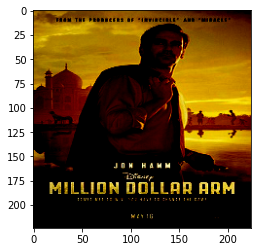

In [32]:
n = 300
pyplot.imshow(X_train[n])

### Get the predicted mask for the image 

In [33]:
sample_image = X_train[n]
ft = preprocess_input(np.array(sample_image, dtype=np.float32))
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([sample_image]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

### Impose the mask on the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


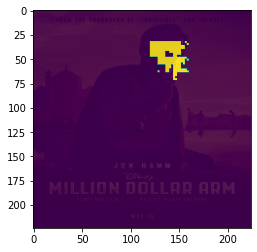

In [34]:
out_image = sample_image
plt.imshow(out_image)
plt.imshow(pred_mask, alpha=0.9)